<a href="https://colab.research.google.com/github/MichelleInnovates/wk-3-ai/blob/main/Deep_Learning_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Model ---
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.7952 - loss: 0.6533 - val_accuracy: 0.9783 - val_loss: 0.0659
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9673 - loss: 0.1116 - val_accuracy: 0.9880 - val_loss: 0.0444
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.9778 - loss: 0.0744 - val_accuracy: 0.9883 - val_loss: 0.0385
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9816 - loss: 0.0623 - val_accuracy: 0.9882 - val_loss: 0.0449
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 90s 121ms/step - accuracy: 0.9852 - loss: 0.0509 - val_accuracy: 0.9908 - val_loss: 0.0337

--- Evaluating Model ---
313/313 - 4s - 14ms/step - accuracy: 0.9906 - loss: 0.0269

Test accuracy: 0.9906

--- Visualizing Predictions ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


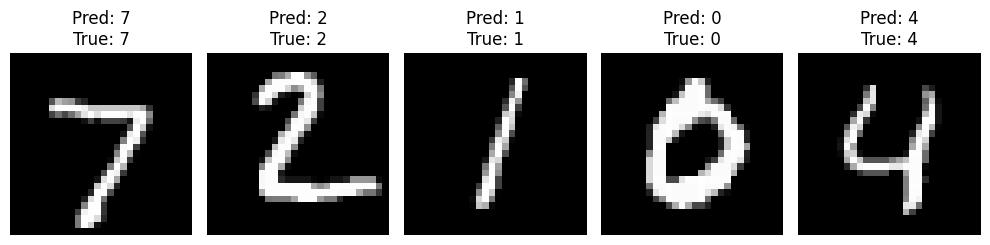

In [ ]:
# Deliverable for Part 2, Task 2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout[1]
    true_label = y_test[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (for CNN input)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# 2. Build the CNN Model
model = Sequential([
    # Input shape: 28x28 pixels, 1 color channel
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(10, activation='softmax') # 10 output classes (digits 0-9)
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 4. Train the model
print("\n--- Training Model ---")
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 5. Evaluate the model on the test set
print("\n--- Evaluating Model ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 6. Visualize predictions on 5 sample images
print("\n--- Visualizing Predictions ---")
predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()